<img src="../logo.png" align="right" width="150" />

#### Teoría de Circuitos II

# Trabajo Semanal 3
#### *Tobias Bavasso Piizzi*

La resolución detallada se puede encontrar [aquí](https://gitlab.frba.utn.edu.ar/tbavassopiizzi/tcii/-/blob/master/Tareas-Semanales/TrabajoSemanal3/EJ3_TBP.pdf) 

El circuito pasivo se puede encontrar [aquí](https://gitlab.frba.utn.edu.ar/tbavassopiizzi/tcii/-/blob/master/Tareas-Semanales/TrabajoSemanal3/circuito_pasivo.asc) 

El circuito activo se puede encontrar [aquí](https://gitlab.frba.utn.edu.ar/tbavassopiizzi/tcii/-/blob/master/Tareas-Semanales/TrabajoSemanal3/Activado.asc) 


## Consigna
<img src="./consigna.png" align="center" width="500"/>

## Plantilla BandPass

Como estamos normalizando sabemos que $\omega _o = 1 \frac{r}{s}$

Y podemos plantear el siguiente sistema de ecuaciones


\begin{equation}
\label{eqn:n1}\tag{1}
1 = Q \cdot ( \omega _{p2} - \omega _{p1})
\end{equation}

\begin{equation}
\label{eqn:n2}\tag{2}
1 = \omega _{p2} \cdot \omega _{p1}
\end{equation}

De aquí podemos obtener todos los valores de nuestra **plantilla BP**

| Frec  | Valor [$\frac{r}{s}$] | Atenuación [dB] |
| -- | -- | -- |
| $\Omega _{s1}$ | 0.77  | > 16 |
| $\Omega _{p1}$ | 0.905 | < 0.5 |
| $\Omega _{p2}$ | 1.105 | < 0.5 |
| $\Omega _{s2}$ | 1.63  | > 24 |

Abajo se muestra la **_Plantilla BandPass normalizada_**


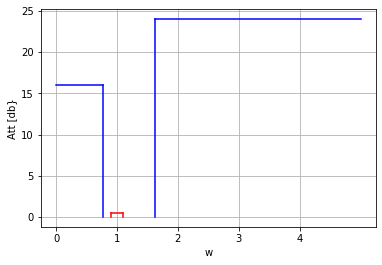

In [5]:
import scipy.signal as sig
import matplotlib as mpl
from splane import analyze_sys, pretty_print_lti
import numpy as np
import matplotlib.pyplot as plt

w_banda_paso = np.linspace(0.905, 1.105)
w_banda_att1 = np.linspace(0, 0.77)  # Para el caso particular w_s=0.8
w_banda_att2 = np.linspace(1.63, 5)  # Para el caso particular w_s=0.8
att_min1 = 16 # dB
att_min2 = 24 # dB
att_max = 0.5  # dB

# Lineas verticales para mejor visualizacion
vertical_banda_paso = np.linspace(0, att_max)
vertical_banda_att1 = np.linspace(0, att_min1)
vertical_banda_att2 = np.linspace(0, att_min2)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db}')
ax.set_xlabel('w')
ax.grid(True)
ticks = range(0, 5)
ax.set_xticks(ticks)
ax.plot(w_banda_paso, [att_max] * len(w_banda_paso), '-r')
ax.plot(w_banda_att1, [att_min1] * len(w_banda_att1), '-b')
ax.plot(w_banda_att2, [att_min2] * len(w_banda_att2), '-b')
ax.plot([0.905] * len(vertical_banda_paso), vertical_banda_paso, '-r')
ax.plot([1.105] * len(vertical_banda_paso), vertical_banda_paso, '-r')
ax.plot([0.77] * len(vertical_banda_att1), vertical_banda_att1, '-b')
ax.plot([1.63] * len(vertical_banda_att2), vertical_banda_att2, '-b')

plt.show()


## Plantillas LowPass

Ahora como el FBP que vamos a diseñar mantiene su media geométrica debemos implementar aquel FLP que cumpla el requisito más exigente de los pedidos.

\begin{equation}
\label{eqn:n3}\tag{3}
\Omega _{silp} = Q \cdot  \frac{ \omega _{sibp}^{2} - 1 }{ \omega _{sibp} } 
\end{equation}

| Frec  | Valor [$\frac{r}{s}$] | $\xi ^{2}$ | Orden N |
| -- | -- | -- | -- |
| $\Omega_{s1}$ | 2.65  | 0.122 | N = 3 |
| $\Omega_{s2}$ | 5.0825 | 0.122 | N = 2 |

Claramente podemos observar que el requisito del lado izquierdo es bastante más exigente, por lo que será necesario diseñar un **_filtro de orden 3_** y la **_atenuación_** en ese punto será de **_27.32 dB_**

Abajo se imprimen las dos plantillas impuestas por las restricciones.

También se calculan numéricamente los demás valores presentados en tabla


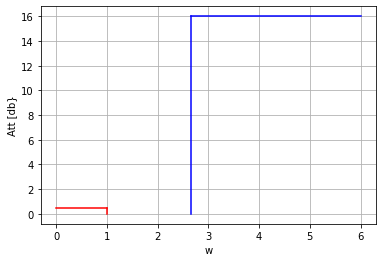

In [9]:
w_banda_paso = np.linspace(0, 1)
w_banda_att = np.linspace(2.65, 6)  # Para el caso particular w_s=0.8
att_min = 16 # dB
att_max = 0.5  # dB

# Lineas verticales para mejor visualizacion
vertical_banda_paso = np.linspace(0, att_max)
vertical_banda_att = np.linspace(0, att_min)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db}')
ax.set_xlabel('w')
ax.grid(True)
ticks = range(0, 7)
ax.set_xticks(ticks)
ax.plot(w_banda_paso, [att_max] * len(w_banda_paso), '-r')
ax.plot(w_banda_att, [att_min] * len(w_banda_att), '-b')
ax.plot([1] * len(vertical_banda_paso), vertical_banda_paso, '-r')
ax.plot([2.65] * len(vertical_banda_att), vertical_banda_att, '-b')

plt.show()

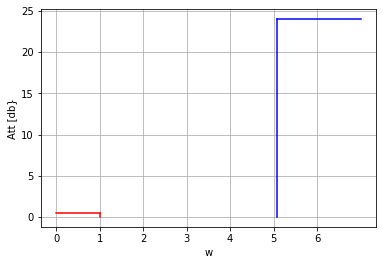

In [10]:
w_banda_paso = np.linspace(0, 1)
w_banda_att = np.linspace(5.0825, 7)  # Para el caso particular w_s=0.8
att_min = 24 # dB
att_max = 0.5  # dB

# Lineas verticales para mejor visualizacion
vertical_banda_paso = np.linspace(0, att_max)
vertical_banda_att = np.linspace(0, att_min)

# Ploteo
fig, ax = plt.subplots()
ax.ticklabel_format(useOffset=False)
ax.set_ylabel('Att [db}')
ax.set_xlabel('w')
ax.grid(True)
ticks = range(0, 7)
ax.set_xticks(ticks)
ax.plot(w_banda_paso, [att_max] * len(w_banda_paso), '-r')
ax.plot(w_banda_att, [att_min] * len(w_banda_att), '-b')
ax.plot([1] * len(vertical_banda_paso), vertical_banda_paso, '-r')
ax.plot([5.0825] * len(vertical_banda_att), vertical_banda_att, '-b')

plt.show()

In [11]:
alfa_max    = 0.5

ws  = 2.65

ee  = 10**(alfa_max/10)-1
print("eps^2 {:f}".format(ee))

for nn in range(1,4):
    #alfa_min_b  =   10*np.log10(1 + ee*ws**(2*nn))   
    alfa_min_c  =   10*np.log10(1 + ee * np.cosh(nn * np.arccosh(ws))**2 )
    #print("nn {:d} -> alfa:min_butter {:f}  - alfa:min_cheby {:f}".format(nn,alfa_min_b,alfa_min_c))
    print("nn {:d} -> alfa:min_cheby {:f}".format(nn,alfa_min_c))

eps^2 0.122018
nn 1 -> alfa:min_cheby 2.687826
nn 2 -> alfa:min_cheby 13.377413
nn 3 -> alfa:min_cheby 27.327230


Con todo esto ya estamos en condiciones de hallar nuestra Transferencia LowPass normalizada

\begin{equation}
\label{eqn:n4}\tag{4}
| T(j\omega)^{2}| = \frac{1}{1+C_3(\omega) \cdot \xi ^{2}}
\end{equation}

Luego de trabajar la expresión se obtiene el siguiete polinomio que representa los polos que me interesan, es decir que están en el semiplano izquierdo.

\begin{equation}
\label{eqn:n5}\tag{5}
| T(s)| = \frac{1}{s^{3} \cdot 1.397 + s^{2} \cdot 1.75 + s \cdot 2.144 + 1}
\end{equation}

| Orden  | Ubicación |
| -- | -- |
| N = 1 | -0.626  | 
| N = 1 | -0.313 + j \cdot 1.021 |
| N = 1 | -0.313 - j \cdot 1.021 |

Lógicamente obtenemos **_3 (tres) polos ubicados en una elipse_**. Vamos a corroborar la ubicación con ayuda la simulaciones matemáticas.




<IPython.core.display.Math object>

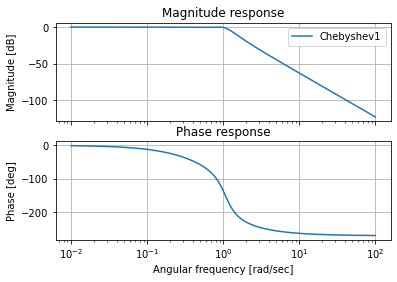

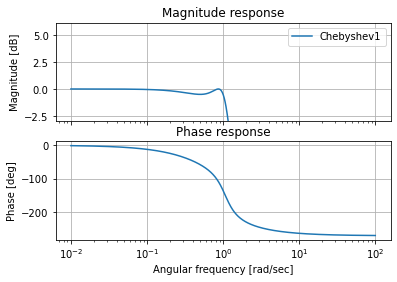

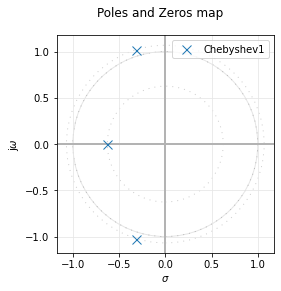

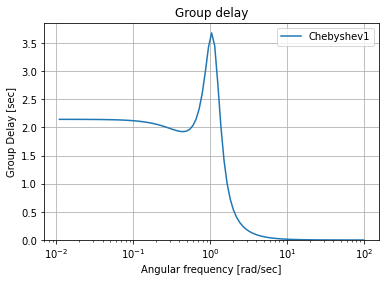

In [14]:
alfa_max = 0.5 # dB
alfa_min = 16 # dB
omega_p = 1 # norm omega
omega_s = 2.65 # norm omega
aprox_name = 'Chebyshev1' # equiripple banda de paso
force_order = -1

if force_order > 0:
    this_order = force_order
else:
    this_order, _ = sig.cheb1ord(omega_p, omega_s, alfa_max, alfa_min, analog=True)

    z,p,k = sig.cheb1ap(this_order, alfa_max)
    
this_lti = sig.ZerosPolesGain(z, p, k).to_tf()

pretty_print_lti(this_lti)

analyze_sys( [this_lti], [aprox_name ])

## Transferencia LowPass Normalizada

\begin{equation}
\label{eqn:n6}\tag{6}
T_{LP}(s) = \frac{0.626}{s+0.626} \cdot \frac{1.14}{s^{2} + s \cdot 0.626 + 1.14}
\end{equation}

La ecuación \ref{eqn:n6} es la **_Transferencia LowPass Normalizada_**. A partir de ella obtendremos su equivalente pasabanda.

\begin{equation}
\label{eqn:n7}\tag{7}
T_{BP}(s) = T_{LP}(s) \biggr\rvert _{s = Q \cdot \frac{s^{2} + 1}{s}}
\end{equation}



## Transferencia BandPass Normalizada

\begin{equation}
\label{eqn:n8}\tag{8}
T_{BP}(s) = 12.1 \cdot \frac{s \cdot \frac{0.626}{5} }{s^2 + s \cdot \frac{0.626}{5} + 1} \cdot \frac{s \cdot \frac{1.107}{16.28}}{s^2 + s \cdot \frac{1.107}{16.28} + 1.226} \cdot \frac{s \cdot \frac{0.902}{16.28}}{s^2 + s \cdot \frac{0.902}{16.28} + 0.815}
\end{equation}

La ecuación\ref{eqn:n8} es la **_Transferencia BandPass Normalizada_** y vemos la importancia de incluir una ganancia para que realmente tenga una ganancia de 0 dB en su banda de paso. Esta ganancia puede ser implementada de muchas maneras. En la solución manuscrita se aprovechó los seguidores de tensión para amplificar en 2 (dos) etapas, por su puesto que es más económico y provechoso realizarlo en una sola etapa. A nuestros efectos es lo mismo.


## Síntesis Pasiva

<img src="./pasivo.png" align="center" width="250"/>

Partiendo del siguiente circuito podemos obtener su transferencia

\begin{equation}
\label{eqn:n9}\tag{9}
T(s) = \frac{s \cdot \frac{1}{R \cdot C}}{s^{2} + s \cdot R \cdot C + \frac{1}{L \cdot C}}
\end{equation}

Utilizaremos las siguientes normas

$\Omega _{Z} = 1k\omega$

$\Omega _{W} = 2 \cdot \pi \cdot 22kHz$

#### 1° FBP

|$\Omega _o$| Q |
|--|--|
|1.00|5|

| Componente  | Valor Normalizado | Valor Desnormalizado |
| -- | -- | -- |
| R | 7.98  | 7.98k$\omega$ |
| L | 1  | 7.23mH |
| C | 1  | 7.23nF |

#### 2° FBP

| $\Omega _o$  | Q |
| -- | -- |
| 1.107 | 16.28  |

| Componente  | Valor Normalizado | Valor Desnormalizado |
| -- | -- | -- |
| R | 14.7  | 14.7k$\omega$ |
| L | 0.815  | 5.89mH |
| C | 1  | 7.23nF |

#### 3° FBP

| $\Omega _o$  | Q |
| -- | -- |
| 0.902 | 16.28  |

| Componente  | Valor Normalizado | Valor Desnormalizado |
| -- | -- | -- |
| R | 18.048  | 18.048k$\omega$ |
| L | 1.226  | 8.86mH |
| C | 1  | 7.23nF |


Ahora vamos a implementar el circuito incluyendo la ganancia en varias etapas como se mencionó anteriormente

<img src="./circuito.png" align="center" width="1000"/>

<img src="./banda_paso.png" align="center" width="1000"/>

Comprobamos que la banda de paso se encuentra entre los rangos buscados.

<img src="./requisitos.png" align="center" width="1000"/>

Comprobamos que los puntos de interés se encuentra por debajo de los rangos buscados.

<img src="./ripple_max.png" align="center" width="1000"/>

Comprobamos que el ripple está en dentro del $\alpha$ Max


## Activando las Bobinas

<img src="./bobina.png" align="center" width="500"/>

A simple vista vemos que el **_GIC_** se comporta como un **_inductor de 1 H_**.

Así que será necesario modificar la transferencia para poder usar el inductor normalizado. Es importante tener en cuenta esta **_"rerenormalización"_**

\begin{equation}
\label{eqn:n10}\tag{10}
T_{BP}(s) = 12.1 \cdot \frac{s \cdot \frac{0.626}{5} }{s^2 + s \cdot \frac{0.626}{5} + 1} \cdot \frac{s \cdot \frac{1}{16.28}}{s^2 + s \cdot \frac{1}{16.28} + 1} \cdot \frac{s \cdot \frac{1}{16.28}}{s^2 + s \cdot \frac{1}{16.28} + 1}
\end{equation}

Analizando la respuesta del circuito propuesto llegamos a que 

\begin{equation}
\label{eqn:n11}\tag{11}
T(s) = \frac{2a}{R} \cdot \frac{s}{s^{2} + s \frac{1}{R} + 1}
\end{equation}

De la \ref{eqn:n9} podemos ver que **_2a = H_** y **_R = Q_**

entonces ya podemos diseñar nuestro circuito normalizado. En este caso decido juntar toda la ganancia en una sola etapa, y adopto **_a = 0.5_ por lo tanto las 2 (dos) R serán iguales**. Podríamos usar otro valor y luego utilizar menos ganancia en la etapa de amplificación. Incluso si no se usara el circuito propuesto con el levantamiento de masa cada etapa podría presentar una ganancia de 2 (dos) veces.

$\Omega _{Z} = 1k\omega$

$\Omega _{W} = 2 \cdot \pi \cdot 22kHz$

$\Omega2 _{W} = \Omega _{W} \cdot 1.107 = 48708 \cdot \pi $

$\Omega3 _{W} = \Omega _{W} \cdot 1.107 = 39688 \cdot \pi $

#### 1° FBP

| $\Omega _o$  | Q |
| -- | -- |
| 1.00 | 5  |

| Componente  | Valor Normalizado | Valor Desnormalizado |
| -- | -- | -- |
| R1 | 15.92  | 15.92k$\Omega$ |
| R2 | 15.92  | 15.92k$\Omega$ |
| C | 1  | 7.23nF |
| Cgic | 1  | 7.23nF |
| Rgic | 1  | 1k$\Omega$ |

#### 2° FBP

| $\Omega _o$  | Q |
| -- | -- |
| 1.00 | 16.28  |

| Componente  | Valor Normalizado | Valor Desnormalizado |
| -- | -- | -- |
| R1 | 32.4  | 32.4k$\Omega$ |
| R2 | 32.4  | 32.4k$\Omega$ |
| C | 1  | 6.53nF |
| Cgic | 1  | 6.53nF |
| Rgic | 1  | 1k$\Omega$ |

#### 3° FBP

| $\Omega _o$  | Q |
| -- | -- |
| 1.00 | 16.28  |

| Componente  | Valor Normalizado | Valor Desnormalizado |
| -- | -- | -- |
| R1 | 32.4  | 32.4k$\Omega$ |
| R2 | 32.4  | 32.4k$\Omega$ |
| C | 1  | 8.02nF |
| Cgic | 1  | 8.02nF |
| Rgic | 1  | 1k$\Omega$ |

<img src="./circ_activado.png" align="center" width="1000"/>

<img src="./banda_paso_activado.png" align="center" width="1000"/>

<img src="./ripple_activado.png" align="center" width="1000"/>

<img src="./corte.png" align="center" width="1000"/>

Nuevamente vemos que la respuesta con las **_bobinas activadas es equivalente a la obtenida con un circuito pasivo_**. Es necesario recordar que todos los valores fueron calculados en el ejercicio manuscrito y se puede llegar a encontrar alguna diferencia en los decimales a la hora de comprobar el circuito.





